In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
from tqdm import tqdm

%matplotlib inline

In [24]:
ref = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv', index_col = [0])
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\'
allFiles=glob.glob(path+"*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)
    
    
merged = ref.merge(analysis, on='lab_id')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


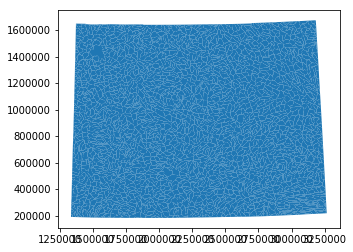

In [25]:
huc12=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12= huc12.to_crs({'init': 'epsg:3732'})
huc12.plot()

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


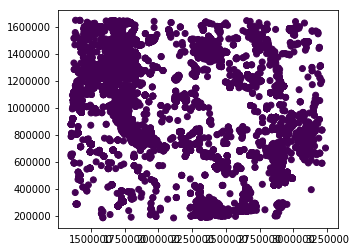

In [26]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(merged.longitude, merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
projGeoDF.plot(column='co_ppm')

In [27]:
points_with_basin=gpd.sjoin(huc12, projGeoDF, how='inner', op='intersects')

In [28]:
maximal = points_with_basin.dissolve(by='HUC_12', aggfunc='max')

In [29]:
maximal = maximal.drop(columns=['AREA', 'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8',
       'HUC_10', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'index_right'])
maximal.to_file(driver='ESRI Shapefile', filename='max_rock_values.shp')